In [1]:
import numpy as np
import pandas as pd
#Importing the libraries to visualize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
#Creating the DataFrame
df = pd.read_csv('measurements.csv')

Exploratory data analysis

Step 1: Refine the data

In [3]:
#Checking the head of the data
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


Most of the columns are not float --> The values has to be converted

In [4]:
#Creating a function to convert the values
def comma_converter(x):
    if type(x) == str and ',' in x:
        a = x.split(',')
        return float(a[0] + '.' + a[1])
    else:
        return float(x)
    
#Converting the data
df['distance'] = df['distance'].apply(comma_converter)
df['consume'] = df['consume'].apply(comma_converter)
df['temp_inside'] = df['temp_inside'].apply(comma_converter)
df['temp_outside'] = df['temp_outside'].apply(comma_converter)
df['refill liters'] = df['refill liters'].apply(comma_converter)

Creating a column with the absolute distance from the beginning of the experiment, and another column with the consumed fuel in liter pro trip.

In [5]:
df['km_absolute'] = df['distance'].cumsum()
df['consume_liter'] = df['consume']/100*df['distance']

Step 2: Data Exploration

Visualizing the data

First, I would like to see how good is the data, and what is inside of the data. The relations between the distance, speed, consume, refill volume should be ok. How distributing the trip distances along the full range etc.:

distance vs Km_Absolute
consume vs distance
temp_outside vs km_absolute
consume vs speed
refill liters vs km_absolute
The colors representing the gas type inside of the tank.

Text(26.689586397058832, 0.5, 'distance [Km]')

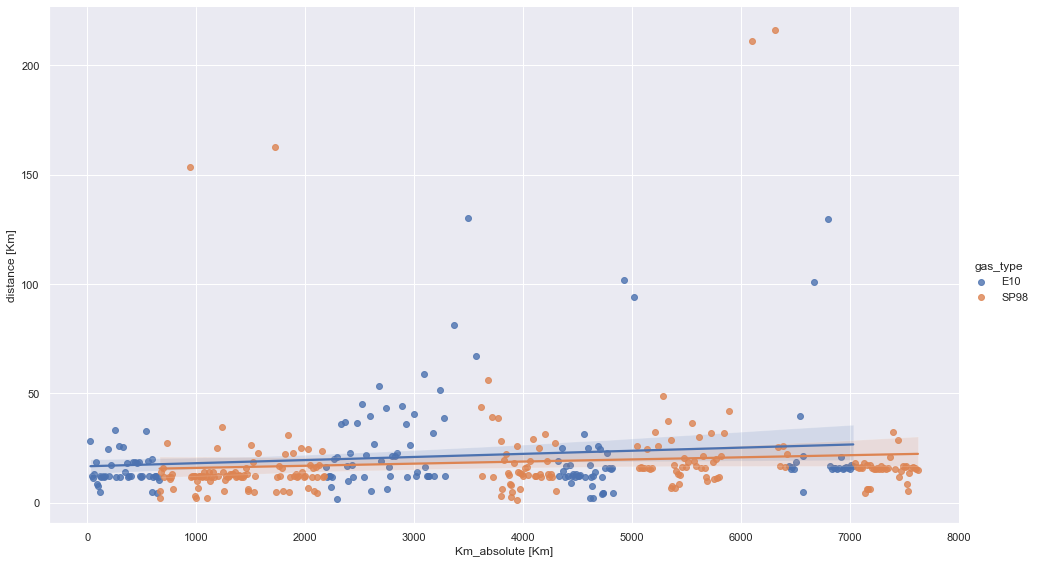

In [6]:
#Distance vs Km_Absolute
#How the the distances distributing during the full distance 
sns.lmplot(data=df,x='km_absolute',y='distance', hue='gas_type', height=8, aspect=1.7,)
plt.xlabel('Km_absolute [Km]')
plt.ylabel('distance [Km]')

Text(26.290000000000006, 0.5, 'consume [l/100km]')

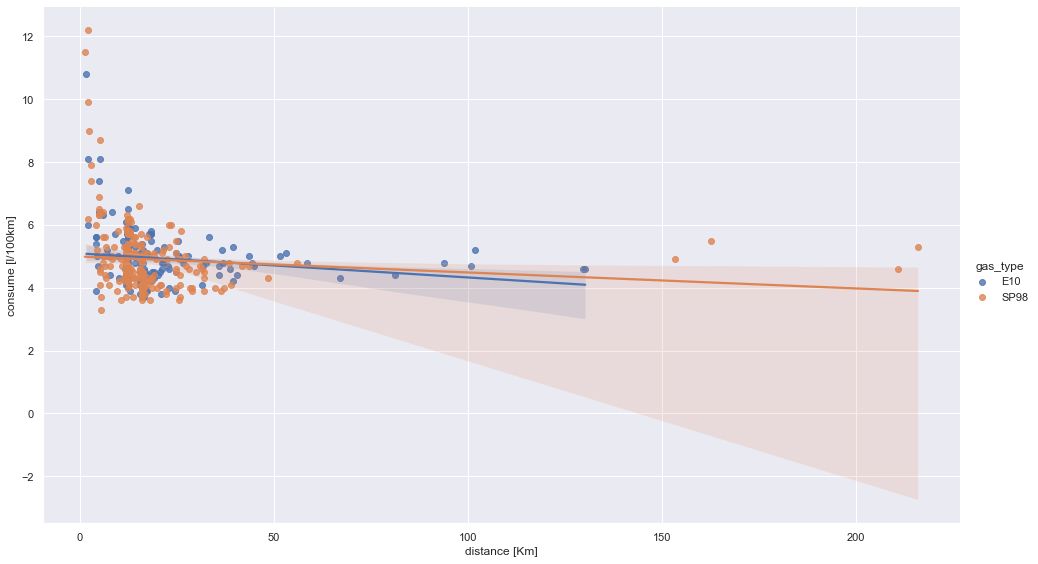

In [7]:
#Consume vs Km_absolute
sns.lmplot(data = df, x = 'distance', y = 'consume', hue = 'gas_type', height=8,aspect=1.7)
plt.xlabel('distance [Km]')
plt.ylabel('consume [l/100km]')

Text(26.340063189338238, 0.5, 'temp_outside [°C]')

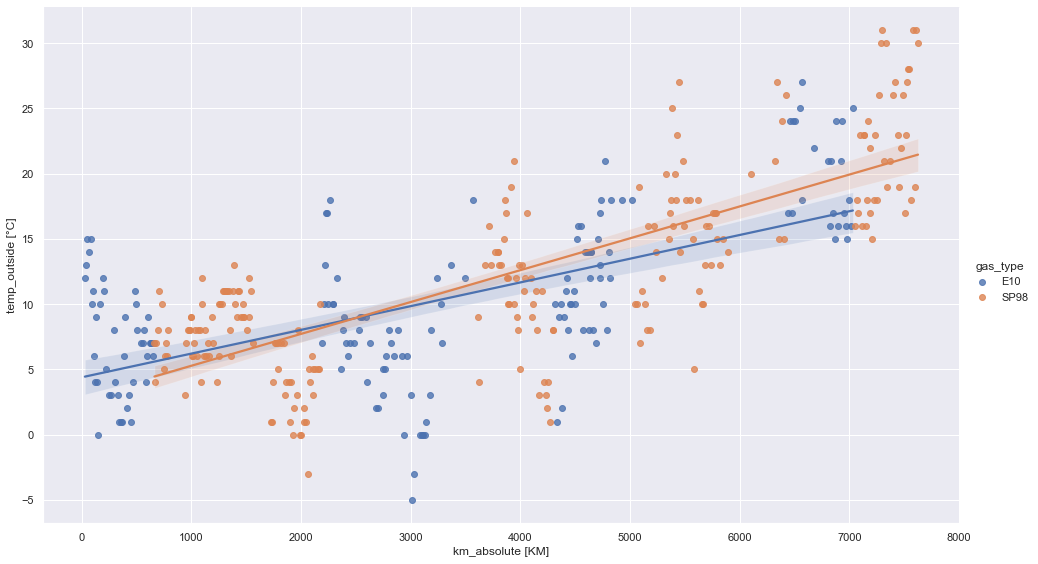

In [8]:
sns.lmplot(data = df, x = 'km_absolute', y =  'temp_outside',hue='gas_type', height=8, aspect=1.7)
plt.xlabel('km_absolute [KM]')
plt.ylabel('temp_outside [°C]')

Text(26.27299632352942, 0.5, 'consume [l/100km]')

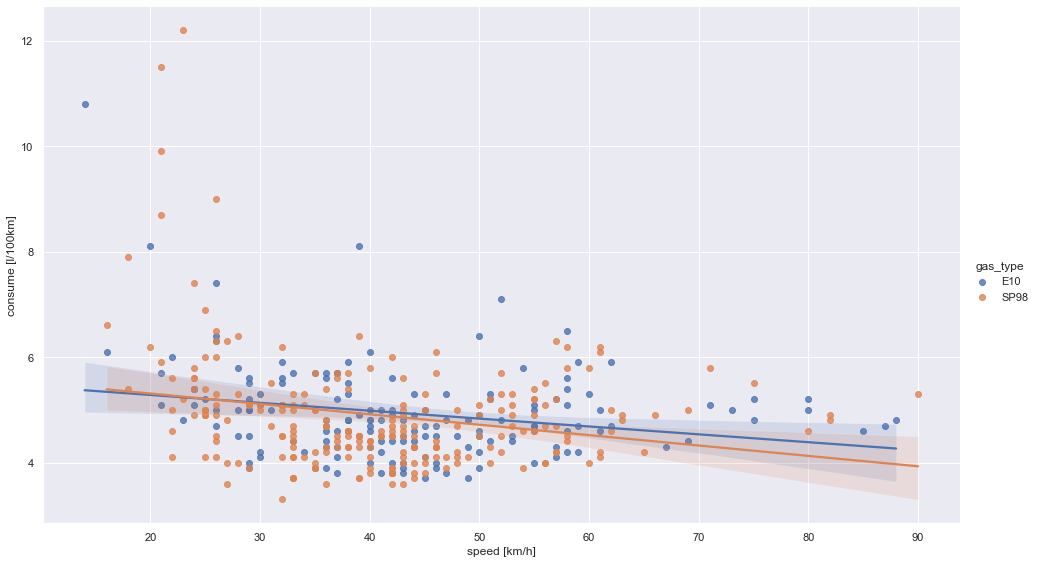

In [9]:
sns.lmplot(data=df, x = 'speed',y =  'consume',hue = 'gas_type', height=8, aspect=1.7)
plt.xlabel('speed [km/h]')
plt.ylabel('consume [l/100km]')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'refill liters [l]')

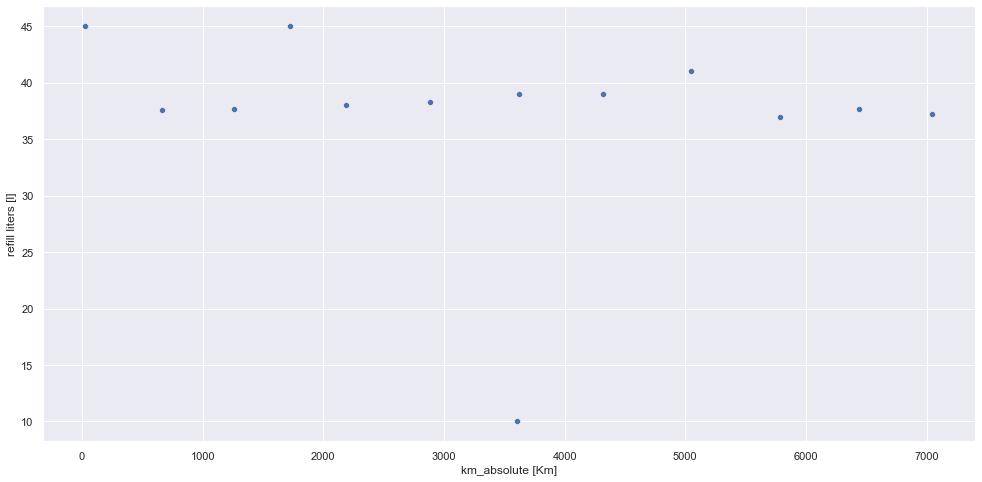

In [10]:
plt.figure(figsize=(16.7,8))
sns.scatterplot(df[df['refill liters']>0]['km_absolute'],df[df['refill liters']>0]['refill liters'])
plt.xlabel('km_absolute [Km]')
plt.ylabel('refill liters [l]')

Some statistic about the distances and speed

I would like to know how standard are the measurements

In [11]:
km_e10 = df[df['gas_type'] == 'E10']['distance'].sum()
km_sp98 = df[df['gas_type'] == 'SP98']['distance'].sum()

avg_e10 = df[df['gas_type'] == 'E10']['distance'].mean()
avg_sp98 = df[df['gas_type'] == 'SP98']['distance'].mean()

std_e10 = df[df['gas_type'] == 'E10']['distance'].std()
std_sp98 = df[df['gas_type'] == 'SP98']['distance'].std()

print('DISTANCES:')
print('Kilometers with E10: ' + str(km_e10))
print('Kilometers with SP98: ' + str(km_sp98))
print('Average distance with E10: ' + str(avg_e10))
print('Average distance with SP98: ' + str(avg_sp98))
print('Deviation of the distances with E10: ' + str(std_e10))
print('Deviation of the distancees with SP98: ' + str(std_sp98))
print('\n')
print(100*'*')
print('\n')
print('SPEED:')
avg_sp_e10 = df[df['gas_type'] == 'E10']['speed'].mean()
avg_sp_sp98 = df[df['gas_type'] == 'SP98']['speed'].mean()

std_sp_e10 = df[df['gas_type'] == 'E10']['speed'].std()
std_sp_sp98 = df[df['gas_type'] == 'SP98']['speed'].std()

print('Average speed with E10: ' + str(avg_sp_e10))
print('Average speed with SP98: ' + str(avg_sp_sp98))
print('Deviation of the speed with E10: ' + str(std_sp_e10))
print('Deviation of the speed with SP98: ' + str(std_sp_sp98))

DISTANCES:
Kilometers with E10: 3375.4
Kilometers with SP98: 4249.9
Average distance with E10: 21.096250000000005
Average distance with SP98: 18.639912280701765
Deviation of the distances with E10: 20.3072341650448
Deviation of the distancees with SP98: 24.179598455931174


****************************************************************************************************


SPEED:
Average speed with E10: 43.50625
Average speed with SP98: 40.82017543859649
Deviation of the speed with E10: 14.077948711978845
Deviation of the speed with SP98: 13.170121570119575


Step 3: Aggregating the data
I think the consumption according to the board computer is not real.I want to see, how many liters are needed for a trip.
I calculate the consumption from the refill volume.
Labeling the rows, which refill period is the actual.

In [12]:
num = df['refill liters'].count()
num_list = []

for i in range(num):
    num_list.append(i)
num_list = num_list[::-1]
    
def refill_events(x):
    if x > 0:
        return num_list.pop()
    else:
        pass
#Crteating the event column   
df['refill_event'] = df['refill liters'].apply(refill_events)

The refill liters column is only have the values when the tank is refilled. I need the values for each row then I can use them to calculate something. The events values have been calculated from the refill liters column so I do the same thing. So I have the correspondig data to each tank period.

In [13]:
#The NaN values have to be replaced with the last value
df['refill liters'].fillna(method = 'bfill', inplace = True)
df['refill_event'].fillna(method = 'bfill', inplace = True)

Creating an aggregated Dataframe groupped by the refill events.

The values in every row, represents the parameters after every refill.
In the table it is obvious, that something is not ok.

The 3. and 4. events have a huge difference in the refill volume and the consumption according to the board computer.
1.Event the car was not fully refueled. Here the consumption cannot be calculated from the distance and the refill liters.
2.Event is very short

In [14]:
consume_per_refill = df.groupby('refill_event').agg({'consume_liter': sum, 'refill liters': np.mean, 'gas_type' : 'first', 'km_absolute': 'last','distance':sum})
consume_per_refill.sort_values('km_absolute', inplace= True)

In [15]:
consume_per_refill

,consume_liter,refill liters,gas_type,km_absolute,distance
refill_event,,,,,
0.0,1.4000,45.0,E10,28.0,28.0
1.0,32.7292,37.6,E10,662.3,634.3
2.0,29.8031,37.7,SP98,1262.8,600.5
3.0,24.4745,45.0,SP98,1725.4,462.6
4.0,24.7634,38.0,SP98,2192.3,466.9
5.0,33.8630,38.3,E10,2887.4,695.1
6.0,33.9869,10.0,E10,3609.2,721.8
7.0,0.5082,39.0,SP98,3621.3,12.1
8.0,32.3618,39.0,SP98,4317.9,696.6


Text(0, 0.5, '[liter]')

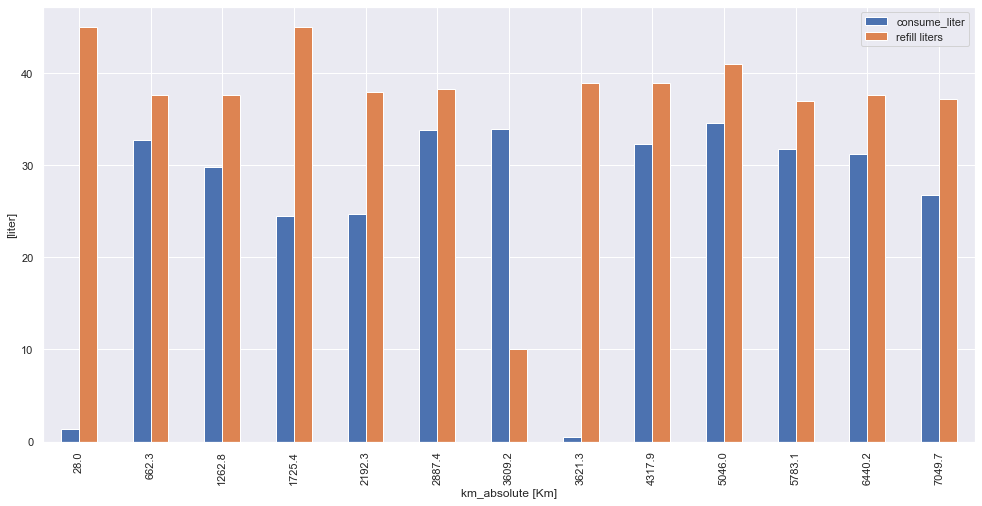

In [16]:
consume_per_refill.round(2).plot('km_absolute',['consume_liter','refill liters'], kind='bar',figsize=(16.7,8))
plt.xlabel('km_absolute [Km]')
plt.ylabel('[liter]')

To see how much liter in the tank, I created a column, where can be seen the theoretical volume.

I did a correction, to get correct results. As you can see in the diagram the volume of the tank is rising up, what of course not possible.

In [17]:
consume_per_refill['tank_inhalt'] = 0
consume_per_refill['tank_inhalt'] =-consume_per_refill['consume_liter']+consume_per_refill['refill liters']
consume_per_refill['tank_inhalt'] = consume_per_refill['tank_inhalt']
#The first fefill supopse to be 45l.
consume_per_refill['tank_inhalt'].loc[0] = 45
consume_per_refill['tank_inhalt'] = consume_per_refill['tank_inhalt'].cumsum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
consume_per_refill

,consume_liter,refill liters,gas_type,km_absolute,distance,tank_inhalt
refill_event,,,,,,
0.0,1.4000,45.0,E10,28.0,28.0,45.0000
1.0,32.7292,37.6,E10,662.3,634.3,49.8708
2.0,29.8031,37.7,SP98,1262.8,600.5,57.7677
3.0,24.4745,45.0,SP98,1725.4,462.6,78.2932
4.0,24.7634,38.0,SP98,2192.3,466.9,91.5298
5.0,33.8630,38.3,E10,2887.4,695.1,95.9668
6.0,33.9869,10.0,E10,3609.2,721.8,71.9799
7.0,0.5082,39.0,SP98,3621.3,12.1,110.4717
8.0,32.3618,39.0,SP98,4317.9,696.6,117.1099


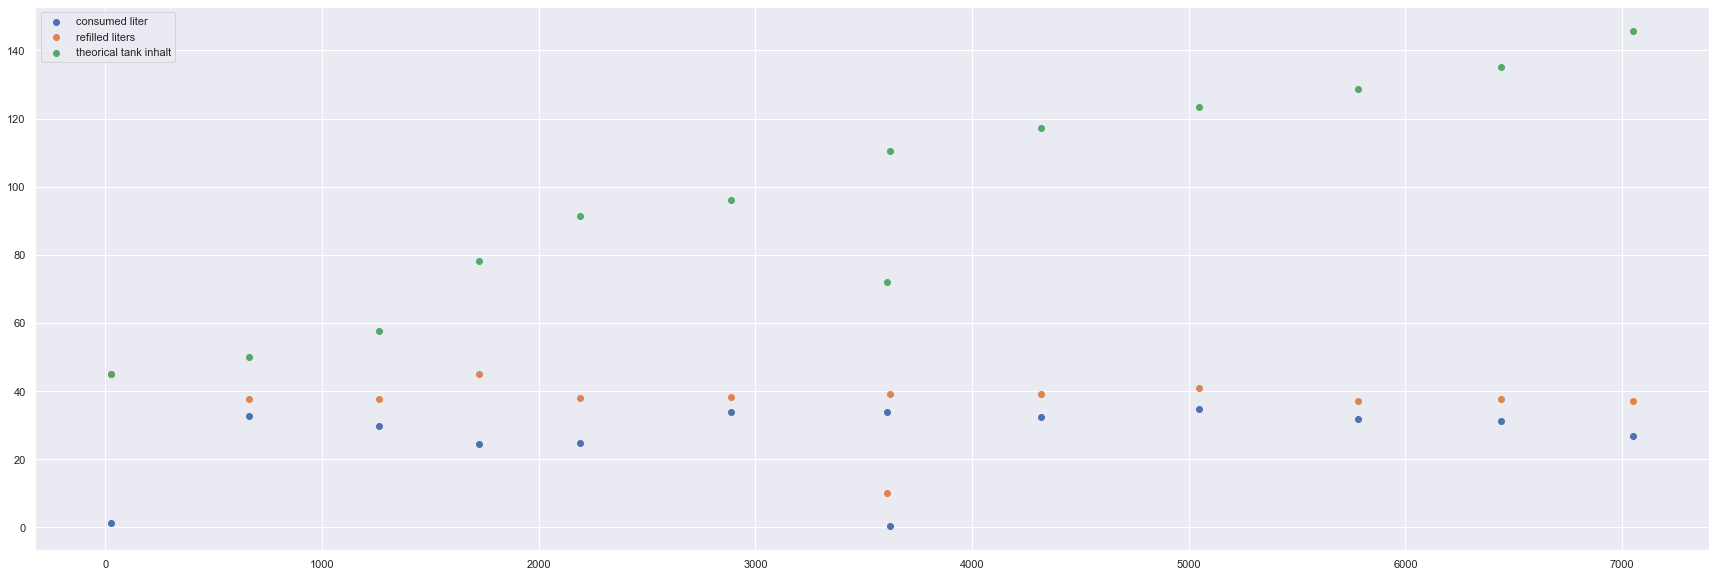

In [19]:
plt.figure(figsize=(30,10))
plt.scatter(consume_per_refill['km_absolute'],consume_per_refill['consume_liter'],)
plt.scatter(consume_per_refill['km_absolute'],consume_per_refill['refill liters'],)
plt.scatter(consume_per_refill['km_absolute'],consume_per_refill['tank_inhalt'],)
plt.legend(['consumed liter','refilled liters','theorical tank inhalt'])

In [20]:
#Calculating the real consumption value
consume_per_refill['consume_from_refill'] = consume_per_refill['refill liters']/consume_per_refill['distance']*100
#Changing the nem of the consume_liter column because this value is the value from the board computer
consume_per_refill.rename(columns = {'consume_liter' : 'consumption_board_comp_l'}, inplace = True)

Step 4: Data cleaning (correcting, refilling values)

I would like to correct the consumption values. I guess that the ratios of the consumptions from the boardcomputer are correct. I use the volume of the used gas volume as 100%. Than I calculate for each row the percentage of the used gas. I use this percentage value to correct the consumption for each trip. I multiplied this value with the refill liters. In this way the consumed volume will equal to the refilled volume.

In [21]:
#Merging the aggregated table to the original df, then I have all calculetad value in the whole dataframe in each 
#refill periods (events)
extended_df = df.merge(consume_per_refill['consumption_board_comp_l'], on='refill_event', how='outer')


#Calculating the ratio
extended_df['consume_ratio'] = extended_df['consume_liter']/extended_df['consumption_board_comp_l']

#Calculating the corrected value
extended_df['consumption_after_correction'] = extended_df['consume_ratio']*extended_df['refill liters']

#Checking the values
extended_df[['consume_liter','refill liters','consumption_board_comp_l','consume_ratio','consumption_after_correction']]

#Converting the values to [l/100km]
extended_df['consume_corrected'] = extended_df['consumption_after_correction']/extended_df['distance']*100

In [22]:
#checking the correction
extended_df.groupby('refill_event').agg({'consumption_after_correction' : sum, 'refill liters' : 'last'})

,consumption_after_correction,refill liters
refill_event,,
0.0,45.0,45.0
1.0,37.6,37.6
2.0,37.7,37.7
3.0,45.0,45.0
4.0,38.0,38.0
5.0,38.3,38.3
6.0,10.0,10.0
7.0,39.0,39.0
8.0,39.0,39.0


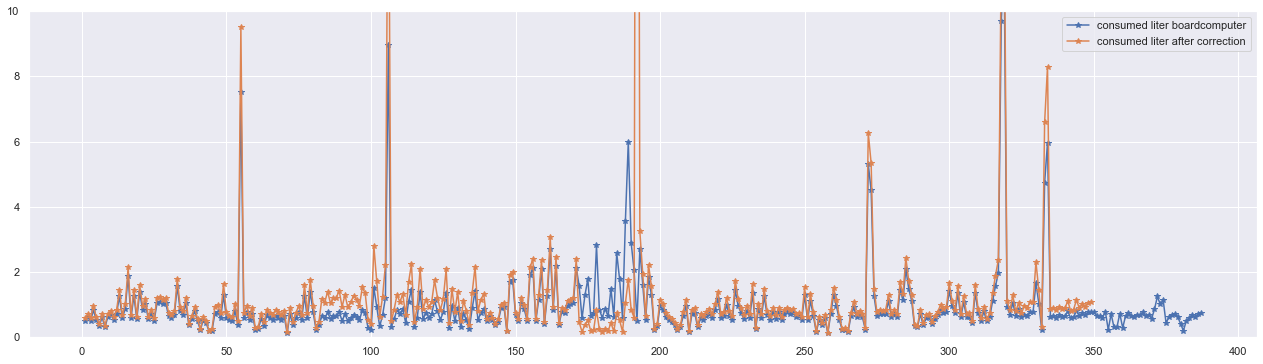

In [23]:
plt.figure(figsize=(22,6))
plt.ylim([0,10])
plt.plot(extended_df['consume_liter'].loc[1:],marker='*')
plt.plot(extended_df['consumption_after_correction'][1:], marker='*')
plt.legend(['consumed liter boardcomputer','consumed liter after correction'],loc = 'upper right')

I would like to see the NaN values in the dataframe to know, where needed some fill operation. Furthermore, one of the most important columns the gas_type is a string column, I need to replace the values with integers.

<AxesSubplot:>

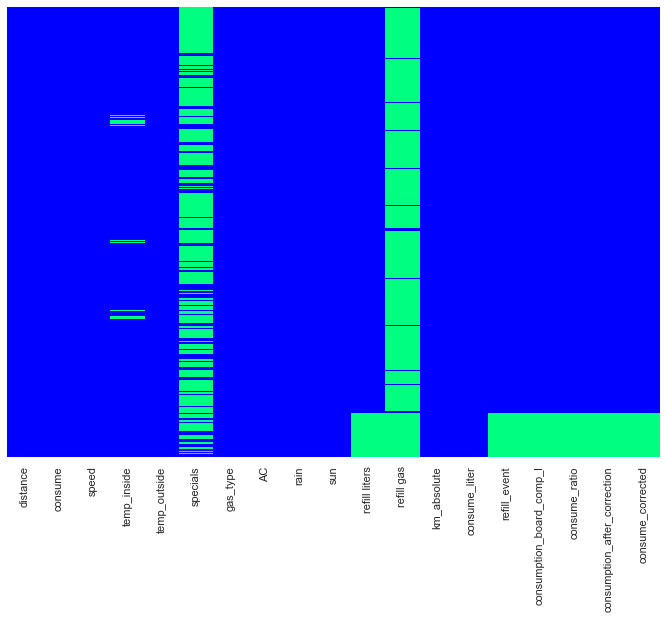

In [24]:
sns.heatmap(extended_df.isnull(), cmap='winter', yticklabels = False, cbar = False)

There are values in the temp_inside column what I need to replace. The other two columns are not interesting for me, in the specials column there are just few values and the refill gas column is not important for me as well.

1.Creating a fuction to replace the strings to integer.
2.Filling the missing rows in the temp_inside
3.Creating a new column with the differnce
4.Creating a test data set from the last few rows

In [25]:
#Function to change the gas_type column string values to integer, then they can be used in the ML section.
def gasType(x):
    if x == 'E10':
        return 0
    else:
        return 1

#Applying the function    
extended_df['gas_type_int'] = extended_df['gas_type'].apply(gasType)
#Just a few value is missing, I use the mean of the full column to fill the NaN values
fill_temp_inside = np.mean(extended_df['temp_inside'])
extended_df['temp_inside'].fillna(fill_temp_inside,inplace = True)

#Calculating a delta T column to see the difference between the inside and outer temperature
extended_df['delta_t'] = extended_df['temp_inside']-extended_df['temp_outside']

In [26]:
test_data = extended_df[extended_df['consume_corrected'].isnull()]

Most of the values are small and the data is normal distributed, so I get rid of the trips, where the consumptions are extreme. There are some irreal values, because of the correction, and because the 6. 7. refill event was not full tank. (aggregated table)

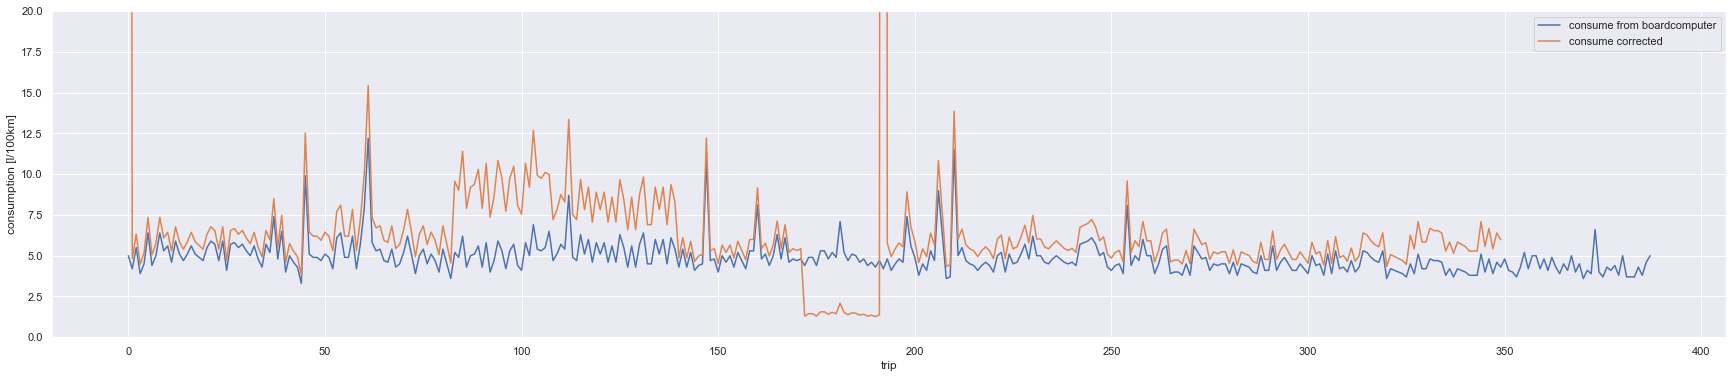

In [27]:
plt.figure(figsize=(30,6))
plt.plot(range(0,len(extended_df)),extended_df[['consume','consume_corrected']])
plt.ylim(0,20)
plt.xlabel('trip')
plt.ylabel('consumption [l/100km]')
plt.legend(['consume from boardcomputer','consume corrected'])

It looks like the values between the ~75-140 trips are not ok.
These are the 3. and 4. events.

In [28]:
#Checking the values which event is that
extended_df[(extended_df['consume_corrected']>7.5) & (extended_df['consume_corrected'].shift(1)>7.5) \
            & (extended_df['consume_corrected'].shift(-1)>7.5)][['refill_event','consume_corrected']].groupby('refill_event').count()

,consume_corrected
refill_event,
3.0,20
4.0,6


I filter out the rows what can lead to missunderstandng. The rows from the 3. - 4. events have been deleted and the rows where the consumption is too big or too small.

In [31]:
extended_df = extended_df[~((extended_df['refill_event'] == 6) | (extended_df['refill_event'] == 7) | (extended_df['refill_event'] == 3) | (extended_df['refill_event'] == 4)) \
                          & ((extended_df['consume_corrected'] > 3) & (extended_df['consume_corrected'] < 8))]

Text(0, 0.5, 'speed [km/h]')

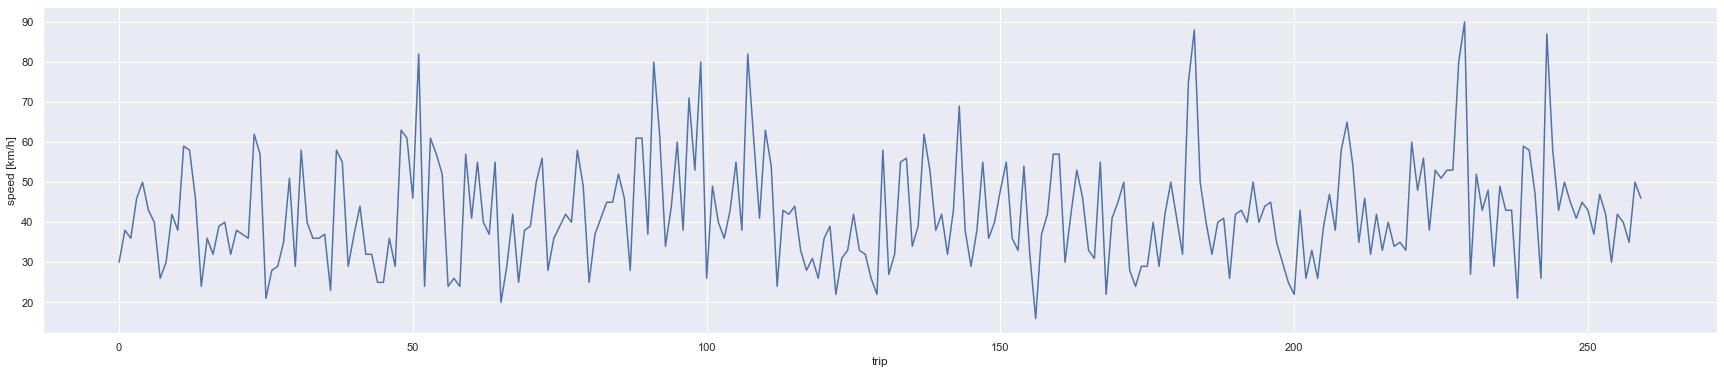

In [32]:
plt.figure(figsize=(30,6))
plt.plot(range(0,len(extended_df)),extended_df[['speed']])
plt.xlabel('trip')
plt.ylabel('speed [km/h]')

In [33]:
print('AC is on ' + str(extended_df[extended_df['AC']>0]['consume'].count()) + 'x')
print('Sunny days ' + str(extended_df[extended_df['sun']>0]['consume'].count()) + 'x')
print('Rainy days ' + str(extended_df[extended_df['rain']>0]['consume'].count()) + 'x')

AC is on 15x
Sunny days 25x
Rainy days 25x


In [36]:
print('There are {} rows that we have  after the data cleaning'.format(extended_df['consume'].count()))

There are 260 rows that we have  after the data cleaning


Let's see whats the average consumption with the fuels.

In [39]:
print('The consumption with E10 is {} liters'.format(round(extended_df[extended_df['gas_type_int'] == 0]['consume'].mean(),2)))
print('The consumption with SP98 is {} liters'.format(round(extended_df[extended_df['gas_type_int'] == 1]['consume'].mean(),2)))
print('\n')
print('The consumption with E10 is {} liters'.format(round(extended_df[extended_df['gas_type_int'] == 0]['consume_corrected'].mean(),2)))
print('The consumption with SP98 is {} liters'.format(round(extended_df[extended_df['gas_type_int'] == 1]['consume_corrected'].mean(),2)))

The consumption with E10 is 4.82 liters
The consumption with SP98 is 4.65 liters


The consumption with E10 is 5.74 liters
The consumption with SP98 is 5.63 liters


Step 5: Linear Regression

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<AxesSubplot:>

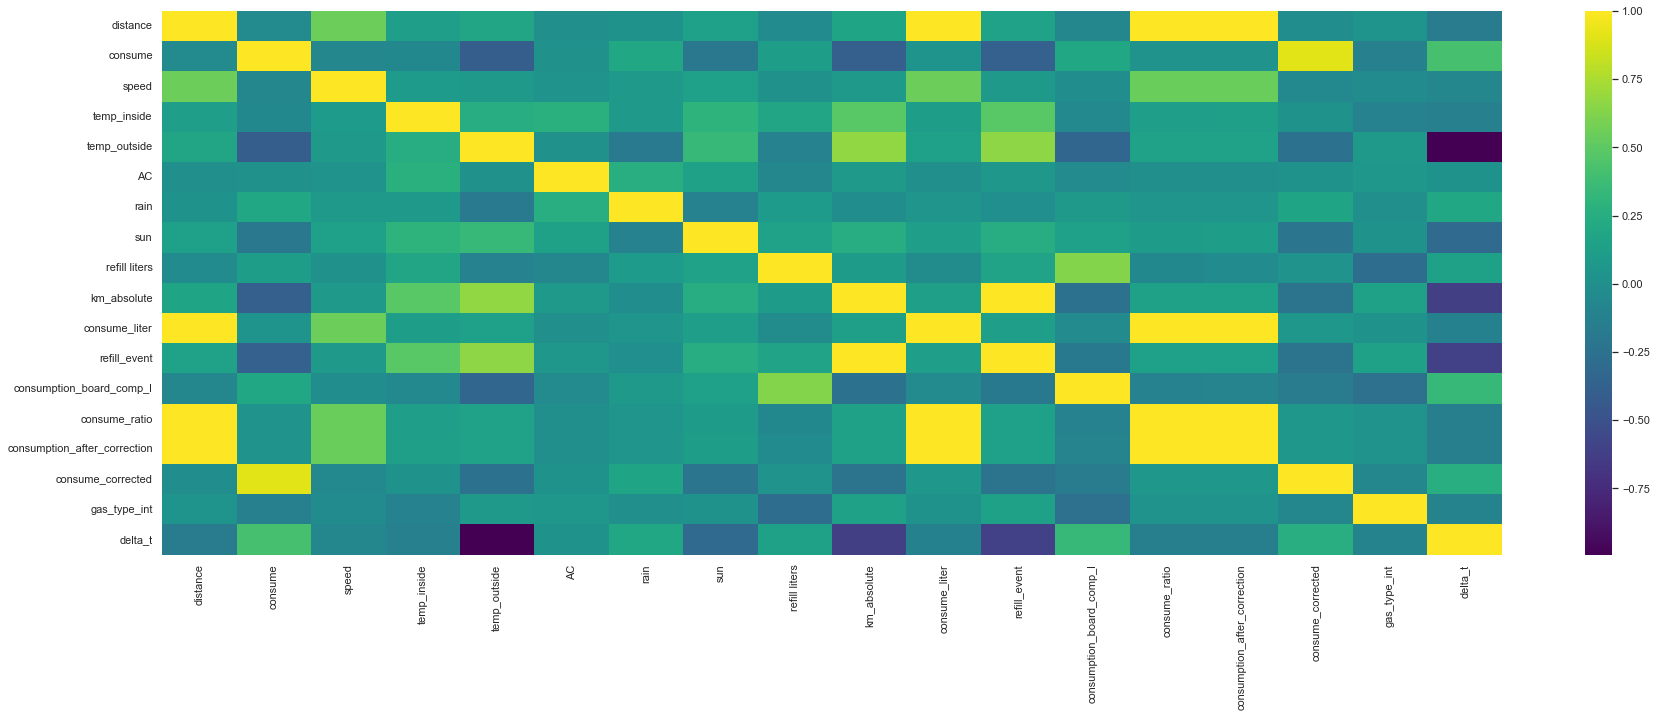

In [41]:
plt.figure(figsize=(30,10))
sns.heatmap(extended_df.corr(),cmap='viridis')

In [42]:
X1 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y1 = extended_df['consume']

X2 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y2 = extended_df['consume_corrected']

X3 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y3 = extended_df['consume']


X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1, test_size=0.3, random_state = 101)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size=0.3, random_state = 101)

X_test3 = test_data[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y_test3 = test_data['consume']

X_train3 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y_train3 = extended_df['consume']

X_train4 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y_train4 = extended_df['consume_corrected']

lm1 = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()
lm4 = LinearRegression()

lm1.fit(X_train1,y_train1)
lm2.fit(X_train2,y_train2)
lm3.fit(X_train3,y_train3)
lm4.fit(X_train4,y_train4)


LinearRegression()

a) Original consumption with splitted data (30%-test;70%-train)
b) Corrected consumption with splitted data (30%-test;70%-train)
c) Original consumption with splitted data (full data*)
d) Corrected consumption with splitted data (full data*)
*Without the last few trips where there are no informations about the last refill

In [43]:
a = pd.DataFrame(lm1.coef_,X1.columns,columns=['Original Consumption (splitted data)'])
b = pd.DataFrame(lm2.coef_,X2.columns,columns=['Corrected Consumption (splitted data)'])
c = pd.DataFrame(lm3.coef_,X3.columns,columns=['Original Consumption (full data)'])
# d = pd.DataFrame(lm4.coef_,X4.columns,columns=['Corrected Consumption(full data)'])

merge_b_c = b.merge(c,right_index=True, left_index=True)
# merge_b_c_d = merge_b_c.merge(d,right_index=True, left_index=True)
# summery = a.merge(merge_b_c_d,right_index=True, left_index=True)
# summery

Step 6: Evaluating the results

In [44]:
pred1 = lm1.predict(X_test1)
pred2 = lm2.predict(X_test2)
pred3 = lm3.predict(X_test3)

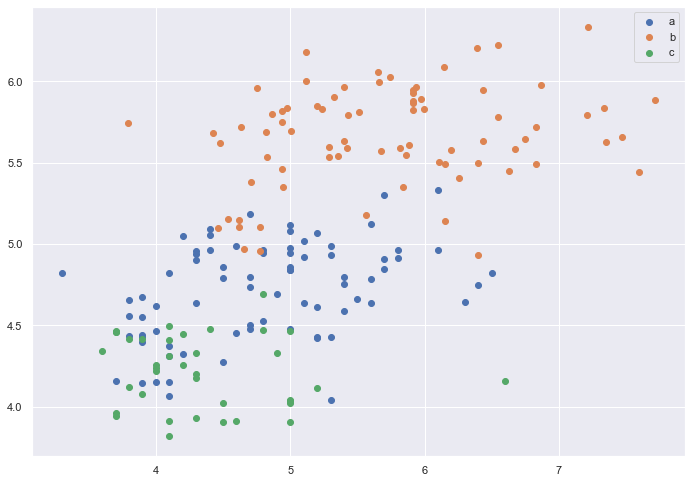

In [45]:
plt.scatter(y_test1,pred1)
plt.scatter(y_test2,pred2)
plt.scatter(y_test3,pred3)
plt.legend(['a','b','c'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

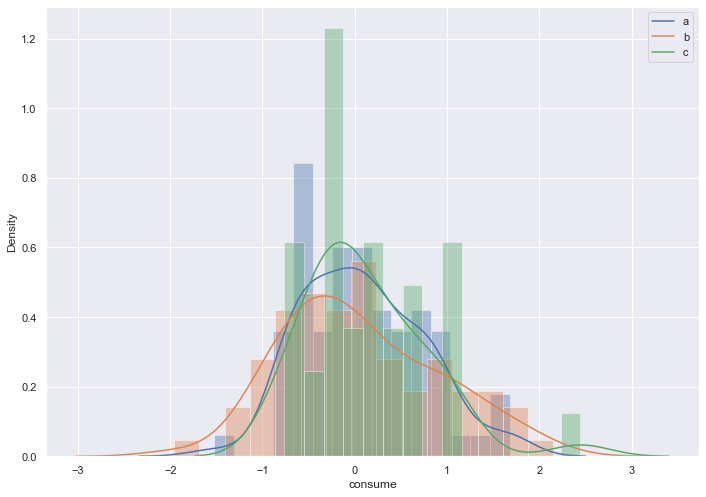

In [46]:
sns.distplot(y_test1-pred1, bins=15)
sns.distplot(y_test2-pred2, bins=15)
sns.distplot(y_test3-pred3, bins=15)
plt.legend(['a','b','c'])

In [47]:
print('Original Consumption: ')
print('MAE: ' + str(metrics.mean_absolute_error(y_test1,pred1)))
print('MSE: ' + str(metrics.mean_squared_error(y_test1,pred1)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test1,pred1))))
print('R^2: ' + str(metrics.r2_score(y_test1,pred1)))
print('\n')

print('Corrected Consumption: ')
print('MAE: ' + str(metrics.mean_absolute_error(y_test2,pred2)))
print('MSE: ' + str(metrics.mean_squared_error(y_test2,pred2)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test2,pred2))))
print('R^2: ' + str(metrics.r2_score(y_test2,pred2)))
print('\n')

print('Original Consumption (full data): ')
print('MAE: ' + str(metrics.mean_absolute_error(y_test3,pred3)))
print('MSE: ' + str(metrics.mean_squared_error(y_test3,pred3)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test3,pred3))))
print('R^2: ' + str(metrics.r2_score(y_test3,pred3)))

Original Consumption: 
MAE: 0.5284533145952277
MSE: 0.4297897025291606
RMSE: 0.6555834825017792
R^2: 0.15194268852590775


Corrected Consumption: 
MAE: 0.6836088019127201
MSE: 0.7156883070762681
RMSE: 0.8459836328654757
R^2: 0.05217049419412256


Original Consumption (full data): 
MAE: 0.5021965685386264
MSE: 0.44604094830940694
RMSE: 0.6678629712069737
R^2: -0.2908253589570189


Using PR and LR for fuel consumption data

In [49]:
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.model_selection import train_test_split # split train and test data 
from sklearn.preprocessing import PolynomialFeatures #polynomial regression
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
df = pd.read_excel('measurements2.xlsx')
df1 = pd.DataFrame(df, columns = ['distance', 'consume', 'temp_outside', 'speed', 'gas_type', 'rain']) # features we want to select
df1['gas_type'] = df1['gas_type'].map({'SP98': 1, 'E10': 0}) # mapping so that the letters are changed into numbers

Now let's split the data and fit a linear model with the features we have selected

In [53]:
y_data = df1['consume']
x_data = df1.drop('consume', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_test, y_test) # R^2 score for test set
lm.score(x_train, y_train) # R^2 score for training set

0.18827021314231396

Let's analyze why the score is too low by plotting residual plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


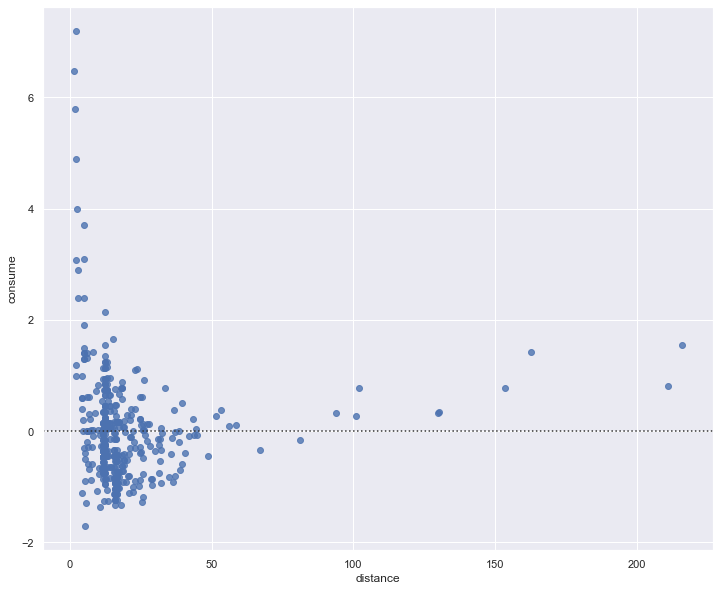

In [54]:
# residual plot 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df1['distance'], df1['consume'])
plt.show()

As you can see, the residuals are not uniformly distributed along the x axis.This means that a linear model is not a good choice in this case. Let's use polynomial regression for this and transform the features so that it can fit in polynomial regression.

In [55]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
# predicting with polynomial regression
Yhat_test_pr = poly.predict(x_test_pr)
poly.score(x_train_pr, y_train)

0.40487273084940545

In [56]:
poly.score(x_test_pr, y_test)

0.29539662204253747

In [58]:
#function to plot the predicted values and the actual value

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Features')
    plt.ylabel('Prediction (cosumption)')

    plt.show()
    plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


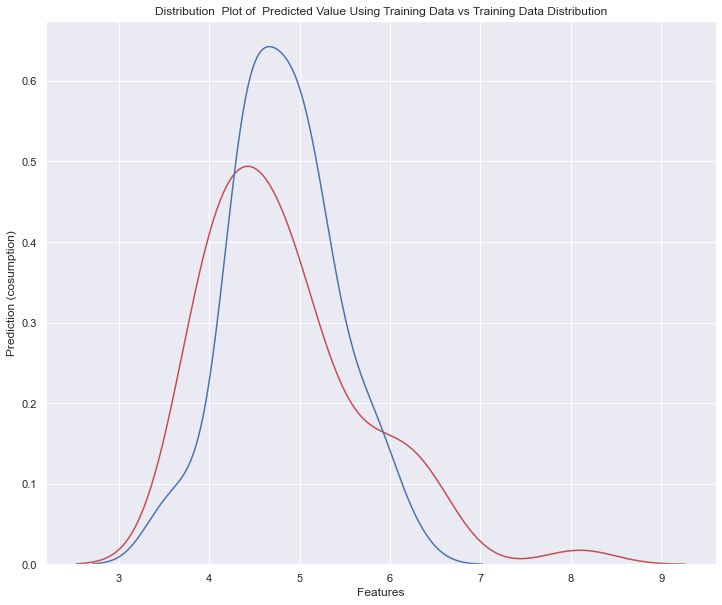

In [59]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, Yhat_test_pr,"Actual Values (Test)", "Predicted Values (Test)", Title)

Let's see a plot for linear model

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


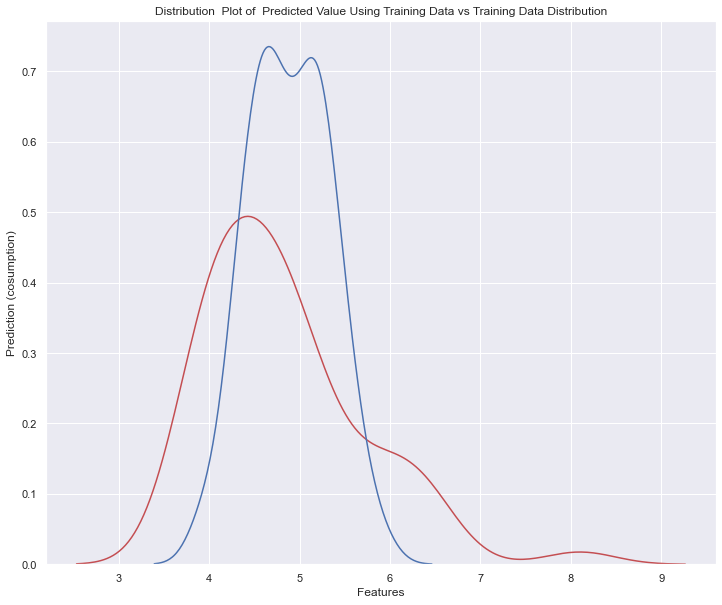

In [60]:
Yhat_train = lm.predict(x_train)
Yhat_test = lm.predict(x_test)
DistributionPlot(y_test, Yhat_test,"Actual Values (Test)", "Predicted Values (Test)", Title)

As you can see,the polynomial is performing better than a simple linear model. The score even for polynomial regression is less. We can analyze that by getting the Mean squared error of the model

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Yhat_test_pr)
print('The mean square error of price and predicted value for PR model is: ', mse)
mse = mean_squared_error(y_test, Yhat_test)
print('The mean square error of price and predicted value for LR model isis: ', mse)

The mean square error of price and predicted value for PR model is:  0.5330534052810738
The mean square error of price and predicted value for LR model isis:  0.5995242515865039


A low MSE score and R^2 score means that there is very less variance in the data and we might need more distributed data in order for our model to perform better.